# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [123]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [124]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [125]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [126]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [127]:
from sklearn.model_selection import train_test_split

X = data.drop(columns="MEDV").values
y=data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=0)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [128]:
from sklearn.linear_model import LinearRegression
house_model = LinearRegression()
house_model.fit(X_train, y_train)
y_pred_train = house_model.predict(X_train)
y_pred_test = house_model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [129]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.7877808902724839
0.6662719929919423


## 4. Calculate and print mean squared error for both the training and the testing set.

In [130]:
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

19.628348663079148
25.301661765846323


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [131]:
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

3.1425897686202826
3.627793423767008


## Classification Model Evaluation

In [132]:
from sklearn.datasets import load_iris
data = load_iris()

In [133]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [134]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [135]:
column_names = data.feature_names

In [136]:
df = pd.DataFrame(data['data'], columns=column_names)

In [137]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [138]:
target = pd.DataFrame(data.target, columns=['class'] )
target

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [139]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [140]:
X = df.values
y = target.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [141]:
from sklearn.linear_model import LogisticRegression
iris_model = LogisticRegression()
iris_model.fit(X_train, y_train)
y_pred_train = iris_model.predict(X_train)
y_pred_test = iris_model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [142]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9666666666666667
1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [143]:
print(balanced_accuracy_score(y_train, y_pred_train))
print(balanced_accuracy_score(y_test, y_pred_test))

0.9653972153972153
1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [144]:
print(precision_score(y_train, y_pred_train, average='macro'))
print(precision_score(y_test, y_pred_test, average='macro'))

0.9687370600414079
1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [88]:
print(recall_score(y_train, y_pred_train, average=None))
print(recall_score(y_test, y_pred_test, average=None))

[1.         0.91891892 0.97727273]
[1. 1. 1.]


## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
print(f1_score(y_train, y_pred_train))
print(f1_score(y_test, y_pred_test))

## 13. Generate confusion matrices for both the training and the testing set.

In [93]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_pred_train))
print('')
print(confusion_matrix(y_test, y_pred_test))

[[39  0  0]
 [ 0 34  3]
 [ 0  1 43]]

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data.drop(columns="MEDV").values
y=data['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

tree_model = DecisionTreeRegressor( 
    max_depth=4,
    criterion="squared_error", 
    splitter="best", 
    min_samples_split=2,         # min samples to split an internal node
    min_samples_leaf=1, 
    )
tree_model.fit(X_train, y_train)
y_pred_train = tree_model.predict(X_train)
y_pred_test = tree_model.predict(X_test)

print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.956309304875399
0.5704922139753149


In [110]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(tree_model, param_grid=params, scoring='r2', cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best R²:", grid.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best R²: 0.6593509070066786


Decision Tree        R² = 0.583
Random Forest        R² = 0.702


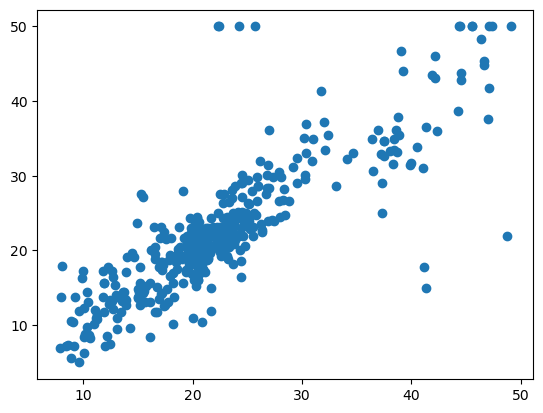

In [116]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=4, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    #"Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    r2 = r2_score(y_test, model.predict(X_test))
    y_preds = model.predict(X_test)
    print(f"{name:20s} R² = {r2:.3f}")





plt.scatter(y_preds,y_test )

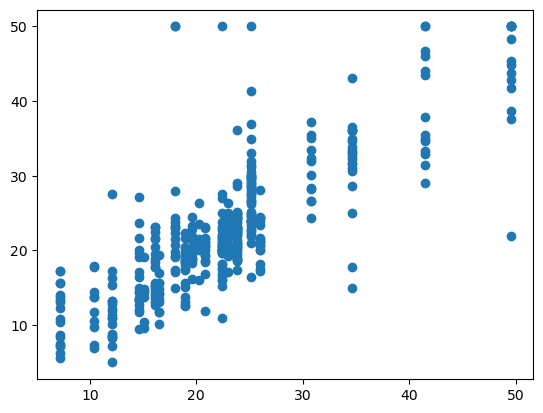

In [114]:
y_grid_pred_test = grid.predict(X_test)

import matplotlib.pyplot as plt

plt.scatter(y_grid_pred_test,y_test )